In [1]:
using DynamicalSystems
using DifferentialEquations
using StaticArrays

Er = -40..40
xr = -40..40
yr = -40..40
box = Er × xr × yr
using CairoMakie

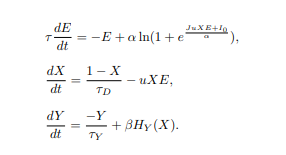

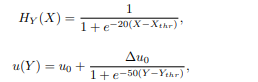

In [280]:
U(y) = U0 + ΔU0 / ( 1 + exp(-50*(y-ythr)) )
σ(x) = 1 / ( 1 + exp(-20*(x-xthr)) )
xthr = .7; ythr = .6

0.6

In [ ]:
# xthr = 0.3 подпороговые при
τ = 0.013; τD = 0.15; τy = 1.8;
α = 0.10
J = 3.259
β = 0.4475
U0 = .3; ΔU0 = .305
I0 = -0.01

p = SA[α, τ, τD, τy, J, U0, ΔU0, β, I0]
tspan = (0.0, 10000.0)

In [236]:
function model(u, p, t)
    
    
    E, x, y = u
    α, τ, τD, τy, J, U0, ΔU0, β, I0 = p
    
    
    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)
    
    return SVector(du1, du2, du3)
end

model (generic function with 1 method)

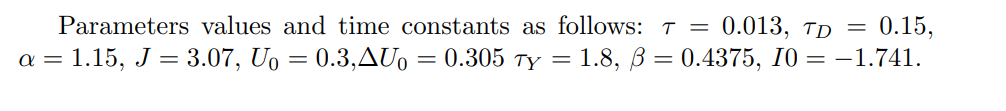

τ = 0.013; τD = 0.15; τy = 1.8;
α = 0.15
J = 3.07
β = 0.4375
U0 = .3; ΔU0 = .305
I0 = -0.1 # -0.1899 # 0.0199

p = SA[α, τ, τD, τy, J, U0, ΔU0, β, I0]
tspan = (0.0, 10000.0)
u0 = SA[0.9, -0.3, -0.7];

In [ ]:
-0.1
-0.1899
0.0199
-0.14

In [334]:
τ = 0.013; τD = 0.15; τy = 1.8;
α = 0.10
J = 3.259
β = 0.4475
U0 = .3; ΔU0 = .305
I0 = 0.011

p = SA[α, τ, τD, τy, J, U0, ΔU0, β, I0]
tspan = (0.0, 10000.0)

(0.0, 10000.0)

In [335]:
ds = ContinuousDynamicalSystem(model, u0, p)

fp, eigs, stable = fixedpoints(ds, box)
fp

3-dimensional Dataset{Float64} with 1 points
 5.44792  0.749758  0.588101

In [336]:
eigs

1-element Vector{Vector{ComplexF64}}:
 [-9.896759806096764 + 0.0im, 0.14706675654586876 - 14.327656565576955im, 0.14706675654586876 + 14.327656565576955im]

In [337]:
stable

1-element Vector{Bool}:
 0

In [338]:
u0 = SA[1.11,   0.988967 ,  0.4861];

prob = ODEProblem(model, u0, tspan, p)
sol = solve(prob, RK4())

retcode: Success
Interpolation: 3rd order Hermite
t: 300097-element Vector{Float64}:
     0.0
     0.03368070477952602
     0.05630876847314553
     0.09132033962552134
     0.12585350611775534
     0.16831174040493904
     0.2154596896942292
     0.27420755342136516
     0.3325547685698734
     0.3860374517903715
     0.437354944854769
     0.48457560627756224
     0.5284417286855231
     ⋮
  9999.657839914185
  9999.689787939029
  9999.722873626828
  9999.761933702552
  9999.798506623505
  9999.840004334512
  9999.874914736944
  9999.907726689142
  9999.940093584624
  9999.974839967772
  9999.999076459679
 10000.0
u: 300097-element Vector{SVector{3, Float64}}:
 [1.11, 0.988967, 0.4861]
 [1.0460608184160203, 0.9815400067742571, 0.4919710885277604]
 [0.9986105139759831, 0.9777855944459547, 0.4958504447534395]
 [0.924520579529351, 0.9735811541070997, 0.5017526897823315]
 [0.8560356274819381, 0.9709532498242477, 0.5074586257188382]
 [0.783678458440061, 0.9692205816527891, 0.5143220435463

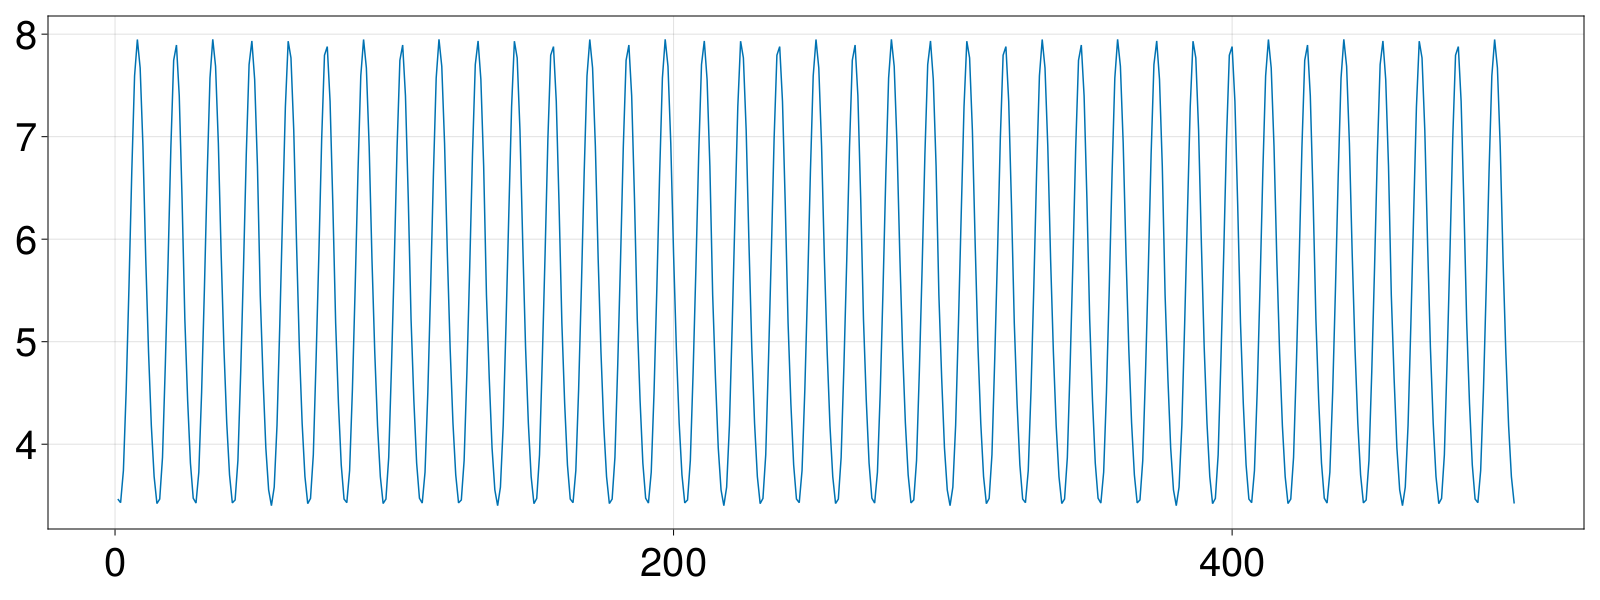

In [339]:
f = Figure(resolution = (1600, 600), fontsize = 40)
ax = Axis(f[1, 1])
ts, tf = 10000, 10500
lines!(sol[1,ts:tf])
f

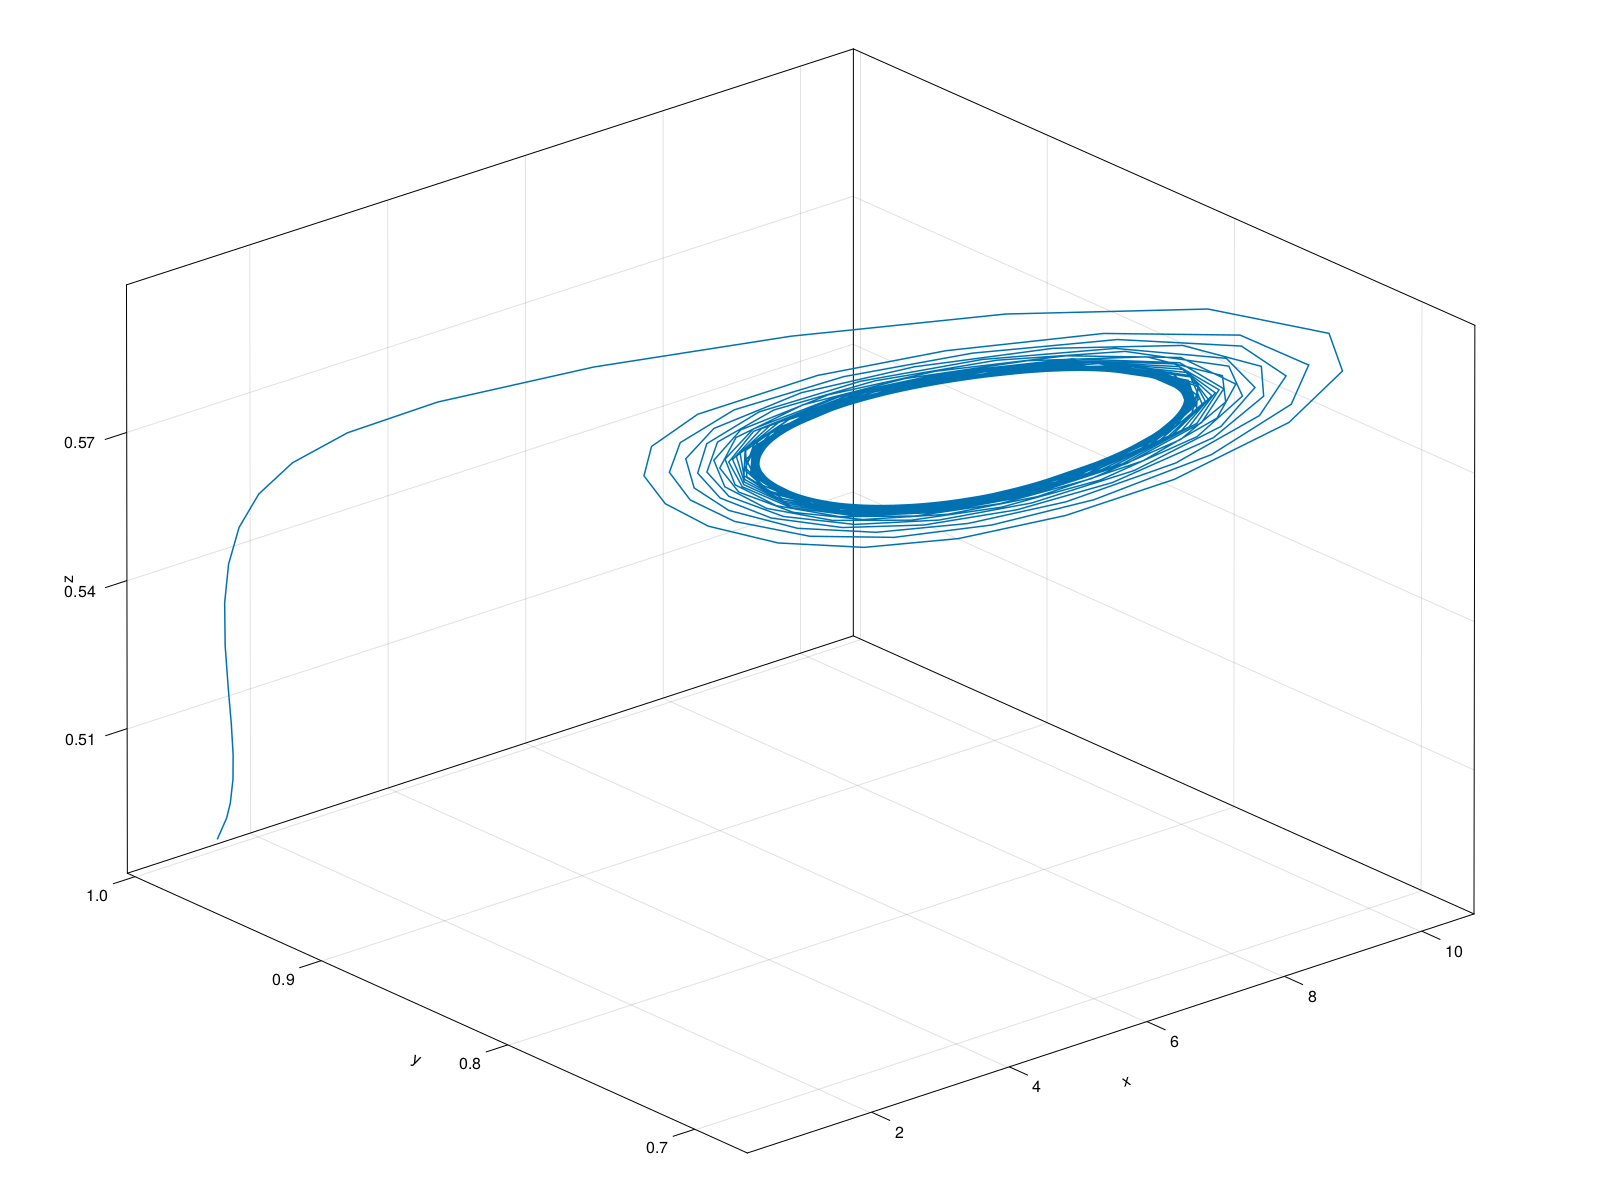

In [340]:
f = Figure(resolution = (1600, 1200)) 

ts, tf = 1, 30500
ax = Axis3(f[1, 1])
lines!(sol[1,ts:tf], sol[2,ts:tf], sol[3,ts:tf] )
f